# WQD7005 - Data Mining

##### Lab 3
##### Matrix Number : 17201091/1
##### Name : LIU,HONGYANG

**Content of Table**
- import libraries
- Data Loading
- Data Preprossing
- show the frequency between account and different services attributes
- Applying Apriori Algorithm
- generating association_rules
- Results & explanation
- Metrics Visualization

##### import libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
from pandas import DataFrame
from mlxtend.frequent_patterns import apriori, association_rules
# pd.options.display.width=200
# pd.set_option('precision',4)
import matplotlib.pyplot as plt
%matplotlib inline

##### Data Loading

In [2]:
df = pd.read_csv('lab2.csv')
df.head()

,ACCOUNT,SERVICE,VISIT
0,500026,CKING,1
1,500026,SVG,2
2,500026,ATM,3
3,500026,ATM,4
4,500075,CKING,1


#####  Data Preprossing

In [3]:
#drop duplicated value
df=df.drop_duplicates(subset=['ACCOUNT','SERVICE'])

In [4]:
#view data
df.head()

,ACCOUNT,SERVICE,VISIT
0,500026,CKING,1
1,500026,SVG,2
2,500026,ATM,3
4,500075,CKING,1
5,500075,MMDA,2


In [5]:
# chekc null data
df.isnull().sum()

ACCOUNT    0
SERVICE    0
VISIT      0
dtype: int64

In [6]:
# check duplicated data
df.duplicated().sum()

0

In [7]:
n_users=df.ACCOUNT.unique().shape[0]
n_items=df.SERVICE.unique().shape[0]
print("The number of users:",n_users)
print("The number of items:",n_items)

The number of users: 7991
The number of items: 13


###### Item: 

ATM - automated teller machine debit card

AUTO automobile installment loan

CCRD credit card

CD certificate of deposit

CKCRD check/debit card

CKING checking account

HMEQLC home equity line of credit

IRA individual retirement account

MMDA money market deposit account

MTG mortgage

PLOAN personal/consumer installment loan

SVG saving account

TRUST personal trust account

##### show the frequency between account and different services attributes
    - 0 represents not happened and 1 represents happened 

In [8]:
relationship=(df.groupby(['ACCOUNT','SERVICE']).size().unstack().reset_index().fillna(0).set_index('ACCOUNT')) #unstack()数据行转列
relationship.iloc[0:10,:]

SERVICE,ATM,AUTO,CCRD,CD,CKCRD,CKING,HMEQLC,IRA,MMDA,MTG,PLOAN,SVG,TRUST
ACCOUNT,,,,,,,,,,,,,
500026,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
500075,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
500129,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
500256,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
500341,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
500350,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
500458,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
500595,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
500743,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [9]:
# Each row of the dataset represents services received by the unique account
relationship.iloc[0]

SERVICE
ATM       1.0
AUTO      0.0
CCRD      0.0
CD        0.0
CKCRD     0.0
CKING     1.0
HMEQLC    0.0
IRA       0.0
MMDA      0.0
MTG       0.0
PLOAN     0.0
SVG       1.0
TRUST     0.0
Name: 500026, dtype: float64

##### Applying Apriori Algorithm
 We will run our apyori model with our transactions and min_support of 0.05.

In [10]:
frequent=apriori(relationship,min_support=0.05,use_colnames=True)

# the datasets with the 10 highest support meritcs
frequent.sort_values(by='support',ascending=False).head(10)

,support,itemsets
5,0.857840,(CKING)
10,0.618696,(SVG)
30,0.541734,"(SVG, CKING)"
0,0.384558,(ATM)
12,0.361907,"(CKING, ATM)"
15,0.256914,"(SVG, ATM)"
38,0.248530,"(SVG, CKING, ATM)"
3,0.245276,(CD)
21,0.209861,"(CKING, CD)"
8,0.174446,(MMDA)


##### generating association_rules

    In a typical setting, you would like to view the rules by lift. Sort the rules using code.


In [11]:
rules=association_rules(frequent,metric='lift',min_threshold=0.8)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CKING),(ATM),0.857840,0.384558,0.361907,0.421882,1.097058,0.032018,1.064562
1,(ATM),(CKING),0.384558,0.857840,0.361907,0.941100,1.097058,0.032018,2.413577
2,(HMEQLC),(ATM),0.164685,0.384558,0.085346,0.518237,1.347619,0.022015,1.277480
3,(ATM),(HMEQLC),0.384558,0.164685,0.085346,0.221933,1.347619,0.022015,1.073577
4,(SVG),(ATM),0.618696,0.384558,0.256914,0.415251,1.079814,0.018990,1.052489
5,(ATM),(SVG),0.384558,0.618696,0.256914,0.668077,1.079814,0.018990,1.148772
6,(CKING),(AUTO),0.857840,0.092854,0.085221,0.099344,1.069884,0.005567,1.007205
7,(AUTO),(CKING),0.092854,0.857840,0.085221,0.917790,1.069884,0.005567,1.729224
8,(SVG),(AUTO),0.618696,0.092854,0.061444,0.099312,1.069548,0.003995,1.007170
9,(AUTO),(SVG),0.092854,0.618696,0.061444,0.661725,1.069548,0.003995,1.127201


##### Results
 
      check the rule A ? B; The results have been sorted using lift attribute. Lift is the confidence divided by expected confidence.

In [12]:
data=DataFrame(rules)
R_result=data[(data['lift']>=1)&(data['confidence']>=0.05)&(data['antecedents']!=frozenset({'CD'}))&(data['consequents']!=frozenset({'CD'}))]
R_result.sort_values(by=['lift'],axis=0,ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
81,"(CKING, CCRD)",(CKCRD),0.148542,0.113002,0.055813,0.375737,3.325045,0.039027,1.420872
84,(CKCRD),"(CKING, CCRD)",0.113002,0.148542,0.055813,0.493909,3.325045,0.039027,1.682421
11,(CCRD),(CKCRD),0.154799,0.113002,0.055813,0.360550,3.190645,0.038320,1.387126
85,(CCRD),"(CKING, CKCRD)",0.154799,0.113002,0.055813,0.360550,3.190645,0.038320,1.387126
80,"(CKING, CKCRD)",(CCRD),0.113002,0.154799,0.055813,0.493909,3.190645,0.038320,1.670058
10,(CKCRD),(CCRD),0.113002,0.154799,0.055813,0.493909,3.190645,0.038320,1.670058
140,"(CKING, ATM)","(SVG, HMEQLC)",0.361907,0.111500,0.060944,0.168396,1.510268,0.020591,1.068416
137,"(SVG, HMEQLC)","(CKING, ATM)",0.111500,0.361907,0.060944,0.546577,1.510268,0.020591,1.407279
144,(HMEQLC),"(SVG, CKING, ATM)",0.164685,0.248530,0.060944,0.370061,1.489001,0.020014,1.192925
133,"(SVG, CKING, ATM)",(HMEQLC),0.248530,0.164685,0.060944,0.245217,1.489001,0.020014,1.106694


###### Result explanation
    for example: 

In [13]:
R_result.head(1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CKING),(ATM),0.85784,0.384558,0.361907,0.421882,1.097058,0.032018,1.064562


If Lift=3.3250 for the rule A=>B,
We can find a person having service (CCRD, CKING) is 3.3250 as likely to have (CKCRD) than a person chosen the service as random

In [14]:
#print the results locally
R_result.to_csv('R_result.csv', index=False, sep=',')

##### Metrics Visualization

- Support VS Confidence

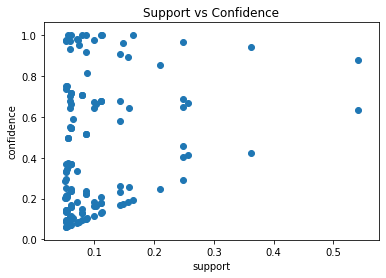

In [15]:
plt.scatter(rules['support'], rules['confidence'], alpha=1)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

- Support VS lift

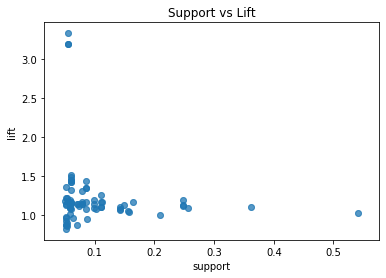

In [16]:
plt.scatter(rules["support"], rules["lift"], alpha=0.5)
plt.xlabel("support")
plt.ylabel("lift")
plt.title("Support vs Lift")
plt.show()